# Submission for SGH by ZACHARY LIM (malaria_inc)

In [1]:
import sqlite3

#Python packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotnine

from plotnine import ggplot, aes, facet_grid, labs, geom_line , geom_point, theme

## Extracting and reading data

Using the variable mal_inc to extract out the dataset from malaria_inc.csv .  We then check if there are any NaN values . If they have, we replace it with the Entity code to keep the data values non-empty.

In [2]:
mal_inc = pd.read_csv("malaria_inc.csv",index_col=False)
count_nan_in_df = mal_inc.isnull().sum()
print (count_nan_in_df)
col_name = list(mal_inc)
print(col_name)
mal_inc['Code'] = mal_inc['Code'].fillna(mal_inc['Entity'])
mal_inc


Entity                                                                                  0
Code                                                                                  108
Year                                                                                    0
Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)      0
dtype: int64
['Entity', 'Code', 'Year', 'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)']


,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746
...,...,...,...,...
503,Zambia,ZMB,2015,173.700000
504,Zimbabwe,ZWE,2000,143.200000
505,Zimbabwe,ZWE,2005,142.500000
506,Zimbabwe,ZWE,2010,129.600000


## Saving malaria_inc into SQL 

We create a database file call "mal_inc.db" that will store the dataset inside. If the file does not exist, the file is created and the data is being stored inside. If it does exist, it wll just connect and run.

In [3]:
my_path = "mal_inc.db"

if not os.path.isfile(my_path):
    con = sqlite3.connect(my_path)
    cur = con.cursor()
    mal_inc.to_sql('malaria_inc', con=sqlite3.connect(my_path))
    
    print("db file has been created and is connected successfully")

else:
    con = sqlite3.connect(my_path)
    cur = con.cursor()
    print("db file has already been created and is now connected successfully")

db file has been created and is connected successfully


D:\Programs\Anaconda\envs\chemzac\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.


## Extracting certain countries to do the data visualization

We will extract the ASEAN countries to do the data visualization. The ASEAN countries involved are Brunei, Cambodia, Indonesia, Laos, Malaysia, Myanmar, the Philippines, Singapore, Thailand, and Vietnam.

In [4]:
# Since Brunei and Singapore are not found in the original data as their incidence is 0
asean_total = pd.read_sql("SELECT * FROM malaria_inc WHERE (entity in ('Brunei','Cambodia','Indonesia', 'Laos','Malaysia', 'Myanmar','Philippines','Singapore','Thailand','Vietnam'))",con)

asean_total

,index,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,56,Cambodia,KHM,2000,207.0
1,57,Cambodia,KHM,2005,48.7
2,58,Cambodia,KHM,2010,20.5
3,59,Cambodia,KHM,2015,13.0
4,220,Indonesia,IDN,2000,99.0
5,221,Indonesia,IDN,2005,119.1
6,222,Indonesia,IDN,2010,129.2
7,223,Indonesia,IDN,2015,26.1
8,240,Laos,LAO,2000,77.5
9,241,Laos,LAO,2005,14.0


## Using ggplot for the data visualization

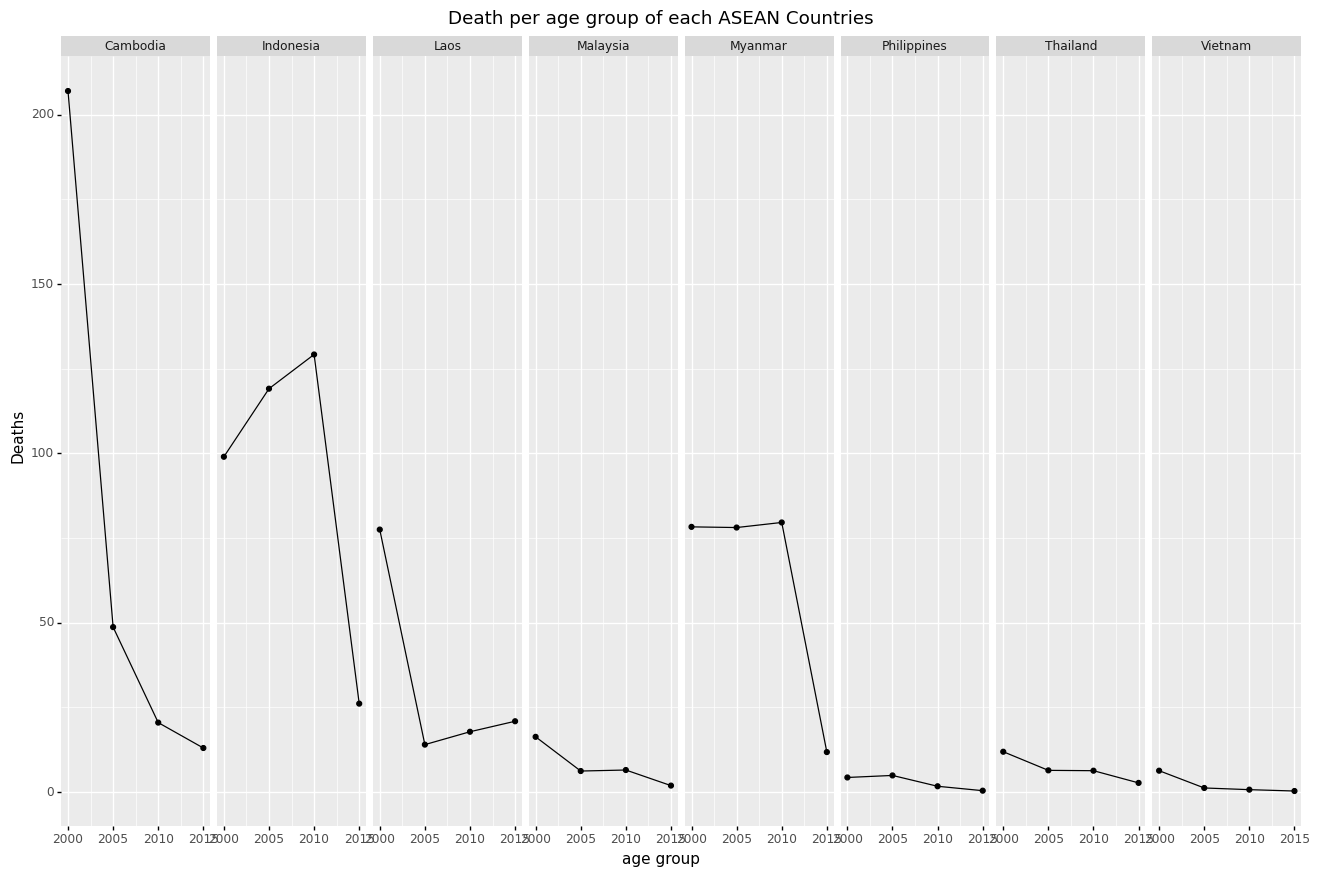

<ggplot: (133577478837)>

In [5]:
(
    ggplot(asean_total,
           aes(x = 'Year', y = col_name[3]))
    + facet_grid(facets=". ~ Entity")
    + labs(
        x="age group",
        y="Deaths",
        title="Death per age group of each ASEAN Countries")
    
    + geom_point()
    + geom_line()
    + theme(figure_size=(16, 10))
    )

## Closing Programs

closing programs that we are done using

In [6]:
con.close()